In [ ]:
# ESSENTIAL IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math

#**Importing the datasets**
It will ask to sign in with Google account. Please give required access. No need to change anything in code, run it as it is. This will download the dataset file in the current runtime environment.


---

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataset_id = "16hvsn7jZ00AvwkIbQH2nhaBCWk0PGYEr"

download = drive.CreateFile({'id': dataset_id})

# Download the file to a local disc
download.GetContentFile('dataset.csv')

## **Dataset for 1st model**


---

In [ ]:
data=pd.read_csv('dataset.csv',header=None,sep='\t')
#Use Linear Discriminant analysis (LDA) to convert dataset1 into the two-dimensional dataset2
lastcol=data[data.columns[64]]               #c values
dat=data
#print(lastcol)
dat.drop(dat.columns[64],axis=1,inplace=True)
traindata=dat.values.tolist()
print(traindata)
#print(traindata)
rows=len(traindata)
columns=len(traindata[0])
#print(rows,columns)
#print(traindata[0][2])
# p1=[[1,2,3,4]]
# p2=[1,2,3,4]
# p3=[1,2,3,-3]
# print(np.add(np.add(p1,p2),p3))

[[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 5.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0

## **Function for LDA analysis**


---

In [ ]:
def LDA(tdata,lastcol):
    maxclass=0
    num=0
    mean=[]#total mean vector
    rows=len(tdata)
    columns=len(tdata[0])
    for i in range(rows):
        if(i==0):
            mean.append(tdata[i])
            #print(mean)
        else:
            mean=np.add(mean,tdata[i])
        if(lastcol[i]==0):
            num+=1
        if(lastcol[i]>maxclass):
            maxclass=int(lastcol[i])
    #print(mean)
    mean=np.divide(mean,rows)
    # print(maxclass)
    maxclass+=1
    #print(num)
    list_of_classes=[]                      #list of vectors in respective classes
    class_means=[]                          #mean of each class
    for i in range(maxclass):
        list_of_classes.append([])
    for i in range(rows):
        temp=[]
        temp.append(tdata[i])
        list_of_classes[int(lastcol[i])].append(temp)
    #print(list_of_classes[0][0])
    for i in range(maxclass):
        class_means.append([])
    for i in range(maxclass):
        l=len(list_of_classes[i])
        temp=list_of_classes[i][0]
        for j in range(1,l):
            temp=np.add(temp,list_of_classes[i][j])
        temp=np.divide(temp,l)                 #floats
        class_means[i]=temp
    #print(np.shape(class_means[0]))
    #calculate within class scatter matrix
    sw=np.zeros((columns,columns))
    for i in range(maxclass):
        temp=[]
        for j in range(len(list_of_classes[i])):
            if(j==0):
                x=np.subtract(list_of_classes[i][j],class_means[i])
                #print(np.shape(x))
                y=np.transpose(x)
                #print(np.shape(y))
                temp=np.dot(y,x)
                #print(temp)
            else:
                x=np.subtract(list_of_classes[i][j],class_means[i])
                temp=np.add(temp,np.dot(np.transpose(x),x))
        if(i==0):
            sw=temp
        else:
            sw=np.add(sw,temp)
    #print(np.shape(sw))
    #calculate between class scatter matrix
    sb=np.zeros((columns,columns))
    for i in range(maxclass):
        x=np.subtract(class_means[i],mean)
        temp=np.multiply(np.dot(np.transpose(x),x),len(list_of_classes[i]))
        if(i==0):
            sb=temp
        else:
            sb=np.add(sb,temp)

    #calculate eigen values and eigen vectors
    s=np.dot(np.linalg.pinv(sw),sb)
    #print(s)
    eigenval,vec=np.linalg.eig(s)
    #print(eigenval)
    #print("vec shape-",np.shape(vec))
    #print(eigenval[0])
    eigenvec=[]
    #print(vec[0])
    #print(np.shape(vec[0]))
    for i in range(len(vec)):
        temp=[]
        temp.append(vec[:,i])
        eigenvec.append(temp)
    #print(eigenvec[0])
    #print(np.shape(eigenvec[0]))
    index=eigenval.argsort()[::-1]
    # for i in range(len(index)):
    #     print(eigenval[index[i]])
    e1=np.transpose(eigenvec[index[0]])
    #print(e1)
    #print(e1)
    e2=np.transpose(eigenvec[index[1]])
    #print(e2)
    #print(eigenval[index[0]])
    w=[]
    w.append(e1)
    w.append(e2)
    w=np.array(w)
    #print(w)
    #print(np.shape(w[0]))
    wt=np.transpose(w)
    #print(np.shape(wt[0]))
    #y=wt*x
    #print(np.shape(np.transpose(wt[0])))
    ans=np.dot(np.transpose(wt[0]),np.transpose(tdata))
    #print(np.shape(ans))
    np.savetxt("ans.csv",ans,delimiter=",")
    #print(ans)
    #plot the data y
    # for i in range(0,len(ans[0])):
    #     ans[0][i]=ans[0][i]*(-1)
    return ans
    # cluster_label=lastcol
    # for i in np.unique(cluster_label):
    #     plt.scatter(dataset[0][cluster_label == i], dataset[1][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)
    # print(y)
    # p1=[1,2,3,4]
    # p2=[1,2,3,4]
    # p1=np.add(p1,p2)
    # print(p1)
    # print(np.divide(np.add(p1,p2),2))


## **Q1a-LDA on data**


---

[[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 5.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


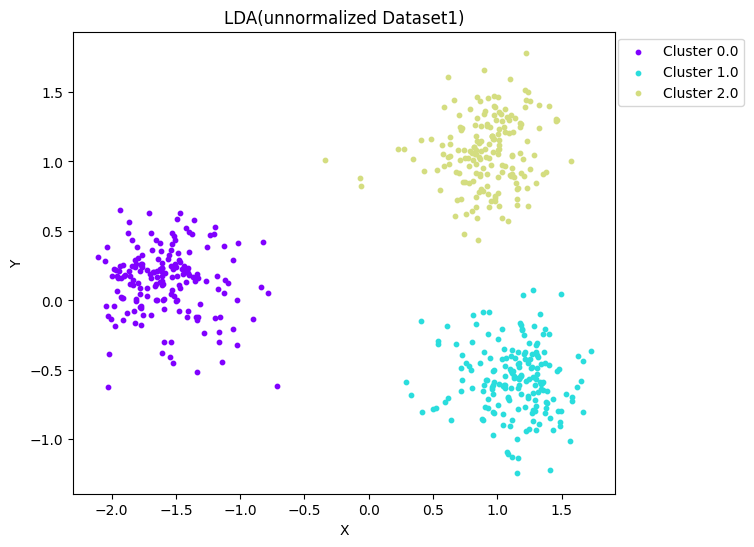

In [ ]:
traindata3=dat.values.tolist()
print(traindata3)
ans=LDA(traindata3,lastcol)
print(np.shape(ans))

fig = plt.figure(figsize=(7, 6))
plt.title("LDA(unnormalized Dataset1)")
plt.xlabel("X")
plt.ylabel("Y")
cluster_label=lastcol

for i in np.unique(cluster_label):
    plt.scatter(ans[0][cluster_label == i], ans[1][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster_label)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## **Q1a-LDA on dataset after normalization**


---

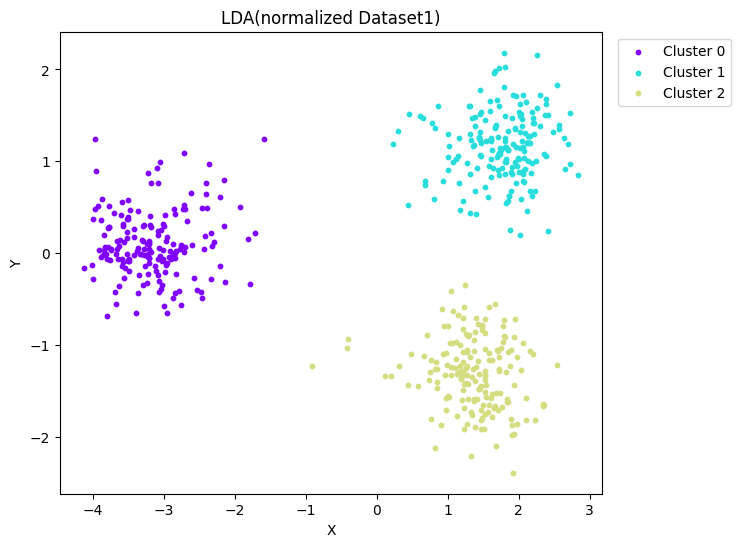

In [ ]:
#zero mean and unit variance normalization of the train data
traindata2=dat.values.tolist()
data1=traindata2
#print(traindata2)
rows=len(data1)
columns=len(data1[0])
cnt=0
removecol=[]
for i in range(columns):
    mean=0
    for j in range(rows):
        mean+=data1[j][i]
    mean=mean/rows
    std=0
    for j in range(rows):
        std+=(data1[j][i]-mean)**2
    std=std/rows
    if(std!=0):
        cnt+=1
        std=math.sqrt(std)
        for j in range(rows):
            data1[j][i]=(data1[j][i]-mean)/std
    else:
        removecol.append(i)
#print(cnt)
data2=[]
data3=[]
for i in range(rows):
    r=[]
    q=[]
    for j in range(columns):
        if (j in removecol):
            continue
        else:
            r.append(data1[i][j])
            q.append(traindata[i][j])
    data2.append(r)
    data3.append(q)
ans1=LDA(data2,lastcol)


cluster_label=lastcol
fig = plt.figure(figsize=(7, 6))
for i in np.unique(cluster_label):
    plt.scatter(ans1[0][cluster_label == i], ans1[1][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(cluster_label)], loc = 'upper right', bbox_to_anchor=(1.25, 1))

plt.title("LDA(normalized Dataset1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## **Unnormalized after removing the columns**


---

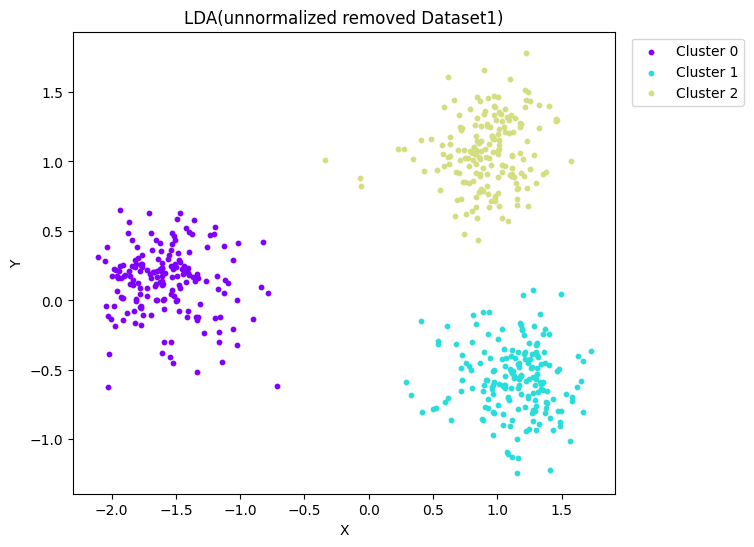

In [ ]:
ans3=LDA(data3,lastcol)
# plt.scatter(ans3[0], ans3[1], c=lastcol, cmap=plt.cm.Paired)

cluster_label=lastcol
fig = plt.figure(figsize=(7, 6))
for i in np.unique(cluster_label):
    plt.scatter(ans3[0][cluster_label == i], ans3[1][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(cluster_label)], loc = 'upper right', bbox_to_anchor=(1.25, 1))

plt.title("LDA(unnormalized removed Dataset1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## **Q1-b PCA analysis on dataset**


---

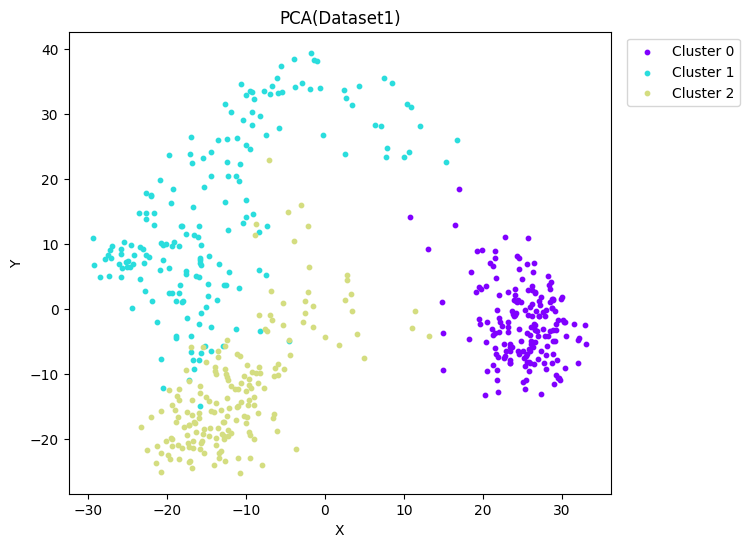

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Create a random n-dimensional dataset
traindata1=dat.values.tolist()
X = traindata1

# Create a PCA object and fit the data
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data to 2-dimensional space
X_2d = pca.transform(X)

# Print the shape of the original and transformed datasets
#print("Original shape:", np.shape(X))
#print("Transformed shape:", np.shape(X_2d))
X_2d=np.transpose(X_2d)

cluster_label=lastcol
fig = plt.figure(figsize=(7, 6))
for i in np.unique(cluster_label):
    plt.scatter(X_2d[0][cluster_label == i], X_2d[1][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(cluster_label)], loc = 'upper right', bbox_to_anchor=(1.25, 1))

# plt.scatter(X_2d[0], X_2d[1], c=lastcol, cmap=plt.cm.Paired)
plt.title("PCA(Dataset1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## **Q1-c building the dataset from dataset obtained from Q1a**


---

In [ ]:
#SPLITTING DATA INTO TRAINING AND VALIDATION SETS
frac = 0.8
dim=np.shape(ans)
row=dim[0]
col=dim[1]
data=np.zeros((col,row+1))
for i in range(col):
    data[i][0]=ans[0][i]
    data[i][1]=ans[1][i]
    data[i][2]=lastcol[i]
np.random.shuffle(data)
#print(data)
test_data = data[int(frac*len(data)):]
train_data = data[:int(frac*len(data))]
#print(test_data)
x=np.array([])
y=np.array([])
c=np.array([])
tx=np.array([])
ty=np.array([])
tc=np.array([])
for i in range(len(train_data)):
    x=np.append(x,train_data[i][0])
    y=np.append(y,train_data[i][1])
    c=np.append(c,train_data[i][2])
for i in range(len(test_data)):
    tx=np.append(tx,test_data[i][0])
    ty=np.append(ty,test_data[i][1])
    tc=np.append(tc,test_data[i][2])

<ipython-input-29-5219412d44f0>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  data[i][0]=ans[0][i]
<ipython-input-29-5219412d44f0>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  data[i][1]=ans[1][i]


## **Prediction function**


---

In [ ]:
def predict(a,meanmat,covarmat,probclass,classes):
    ans=np.array([])
    for i in range(len(a)):
        p=np.array([[a[i][0]],[a[i][1]]])
        prob=[]
        for j in range(0,classes):
            if(j==0):
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))
            elif(j==1):
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))
            else:
                expo=np.exp(-0.5*(p-meanmat[j]).T.dot(np.linalg.inv(covarmat[j])).dot(p-meanmat[j]))
                prob.append(probclass[j]*expo/(np.sqrt(np.linalg.det(covarmat[j]))*2*np.pi))

        ans=np.append(ans,prob.index(max(prob)))
    return ans

## **Q1c-Bayes Classifier**


---

Accuracy on training data is  100.0
Accuracy on test data is  100.0


[Text(0.5, 25.722222222222214, 'Output Class'),
 Text(518.4494949494949, 0.5, 'Target Class')]

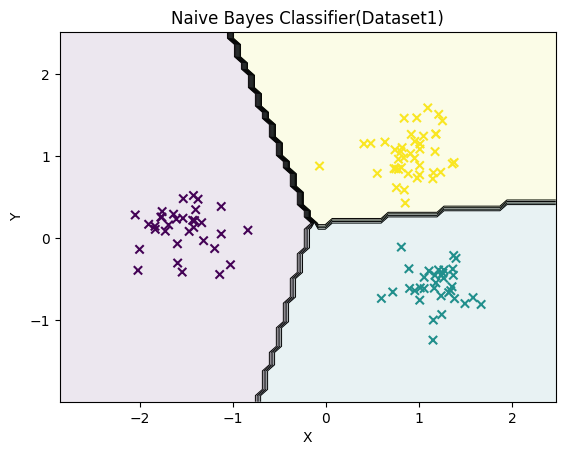

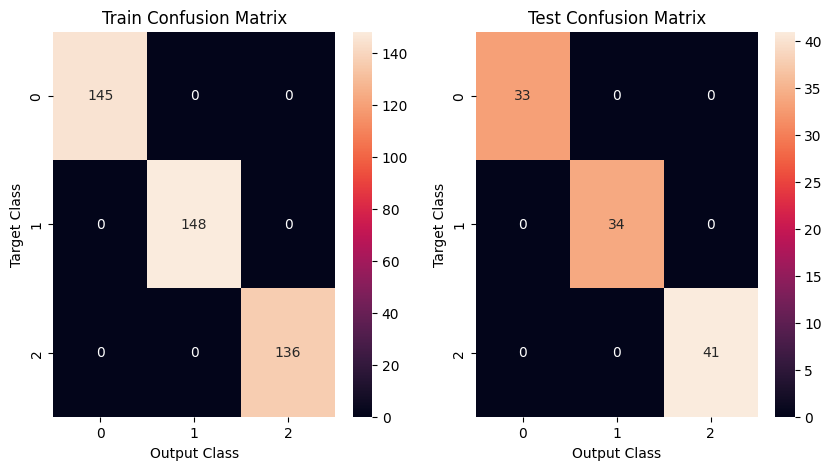

In [ ]:
dx1=[]
dx2=[]
dx3=[]
dy1=[]
dy2=[]
dy3=[]

for i in range(0,len(x)):
    if(c[i]==0):
        dx1.append(x[i])
        dy1.append(y[i])
    elif(c[i]==1):
        dx2.append(x[i])
        dy2.append(y[i])
    else:
        dx3.append(x[i])
        dy3.append(y[i])


probclass=[len(dx1)/len(x),len(dx2)/len(x),len(dx3)/len(x)]

xmean1=sum(dx1)/len(dx1)
xmean2=sum(dx2)/len(dx2)
xmean3=sum(dx3)/len(dx3)
ymean1=sum(dy1)/len(dy1)
ymean2=sum(dy2)/len(dy2)
ymean3=sum(dy3)/len(dy3)

meanmat1=np.array([[xmean1],[ymean1]])
meanmat2=np.array([[xmean2],[ymean2]])
meanmat3=np.array([[xmean3],[ymean3]])

#meantmat here
meanmatlist=[meanmat1,meanmat2,meanmat3]

covarmat=np.array([[1,0],[0,1]])

#list of covarmatrices
covarmatlist=[covarmat,covarmat,covarmat]
predic=[]
tpredic=[]

acctrain=0
acctest=0

for i in range(len(x)):
    p=np.array([[x[i]],[y[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==c[i]):
        acctrain+=1

    predic.append(prob.index(max(prob)))

print("Accuracy on training data is ",acctrain/len(x)*100)

for i in range(len(tx)):
    p=np.array([[tx[i]],[ty[i]]])
    prob=[]
    for j in range(0,3):
        if(j==0):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat1).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat1))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        elif(j==1):
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat2).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat2))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))
        else:
            prob.append(probclass[j]*np.exp(-0.5*(p-meanmat3).T.dot(np.linalg.inv(covarmat)).dot(p-meanmat3))/(np.sqrt(np.linalg.det(covarmat))*2*np.pi))

    if(prob.index(max(prob))==tc[i]):
        acctest+=1

    tpredic.append(prob.index(max(prob)))

print("Accuracy on test data is ",acctest/len(tx)*100)


#plotting the test data
plt.scatter(tx, ty, c=tc, marker='x')
plt.title("Naive Bayes Classifier(Dataset1)")
plt.xlabel("X")
plt.ylabel("Y")

deltaX = x.max() - x.min()
deltaY = y.max() - y.min()
delta = min(deltaX, deltaY)

step = delta / 40
x_min = min(x.min(), tx.min()) - 10 * step
x_max = max(x.max(), tx.max()) + 10 * step
y_min = min(y.min(), ty.min()) - 10 * step
y_max = max(y.max(), ty.max()) + 10 * step


Xs, Ys = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#print(np.c_[Xs.ravel(), Ys.ravel()].shape)
Z = predict(np.c_[Xs.ravel(), Ys.ravel()], meanmatlist, covarmatlist, probclass,3)
Z = Z.reshape(Xs.shape)
plt.contourf(Xs, Ys, Z, alpha=0.1)
plt.contour(Xs, Ys, Z, colors='k', linewidths=.7)

 # PLOTTING THE CONFUSION MATRIX
confusionMatrix_train = np.zeros((3, 3))
confusionMatrix_test = np.zeros((3, 3))

for i in range(len(x)):
    predicted = predict(np.c_[x[i],y[i]], meanmatlist, covarmatlist, probclass,3)
    #print(predicted.shape)
    actual = int(c[i])
    #print(actual,predicted[0])
    confusionMatrix_train[actual][int(predicted[0])] += 1

for i in range(len(tx)):
    predicted = predict(np.c_[tx[i],ty[i]], meanmatlist, covarmatlist, probclass,3)
    actual = int(tc[i])
    confusionMatrix_test[actual][int(predicted[0])] += 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Train Confusion Matrix")
ax2.set_title("Test Confusion Matrix")



s1 = sns.heatmap(confusionMatrix_train, annot=True, ax=ax1, fmt='g')
s2 = sns.heatmap(confusionMatrix_test, annot=True, ax=ax2, fmt='g')

s1.set(xlabel='Output Class', ylabel='Target Class')
s2.set(xlabel='Output Class', ylabel='Target Class')